In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your dataset
train_dir = 'C:\\Users\\Lenovo\\Downloads\\Animal Emotion\\afhq\\train'
val_dir = 'C:\\Users\\Lenovo\\Downloads\\Animal Emotion\\afhq\\val'

# Define image dimensions and batch size
img_height = 128
img_width = 128
batch_size = 32

# Initialize ImageDataGenerator for training set with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Initialize ImageDataGenerator for validation set (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented data for training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Generate batches of validation data (no augmentation)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define and compile your model
model = tf.keras.Sequential([
    # Define your layers here (e.g., Conv2D, MaxPooling2D, Flatten, Dense)
    # Example:
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Adjust number of units for output classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 10  # Adjust number of epochs as needed
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)



Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


c:\Users\Lenovo\Downloads\Animal Emotion\animalenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\Lenovo\Downloads\Animal Emotion\animalenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


458/458 ━━━━━━━━━━━━━━━━━━━━ 466s 998ms/step - accuracy: 0.6668 - loss: 0.7054 - val_accuracy: 0.9427 - val_loss: 0.1550
Epoch 2/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 240s 518ms/step - accuracy: 0.9022 - loss: 0.2621 - val_accuracy: 0.9547 - val_loss: 0.1195
Epoch 3/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 239s 517ms/step - accuracy: 0.9293 - loss: 0.1882 - val_accuracy: 0.9593 - val_loss: 0.1001
Epoch 4/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 639s 1s/step - accuracy: 0.9406 - loss: 0.1583 - val_accuracy: 0.9653 - val_loss: 0.0903
Epoch 5/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 320s 695ms/step - accuracy: 0.9478 - loss: 0.1398 - val_accuracy: 0.9620 - val_loss: 0.0982
Epoch 6/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 277s 599ms/step - accuracy: 0.9604 - loss: 0.1124 - val_accuracy: 0.9787 - val_loss: 0.0575
Epoch 7/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 281s 610ms/step - accuracy: 0.9627 - loss: 0.1016 - val_accuracy: 0.9847 - val_loss: 0.0543
Epoch 8/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 276s 597ms/step - accuracy: 0.9642 - loss: 0.0987 

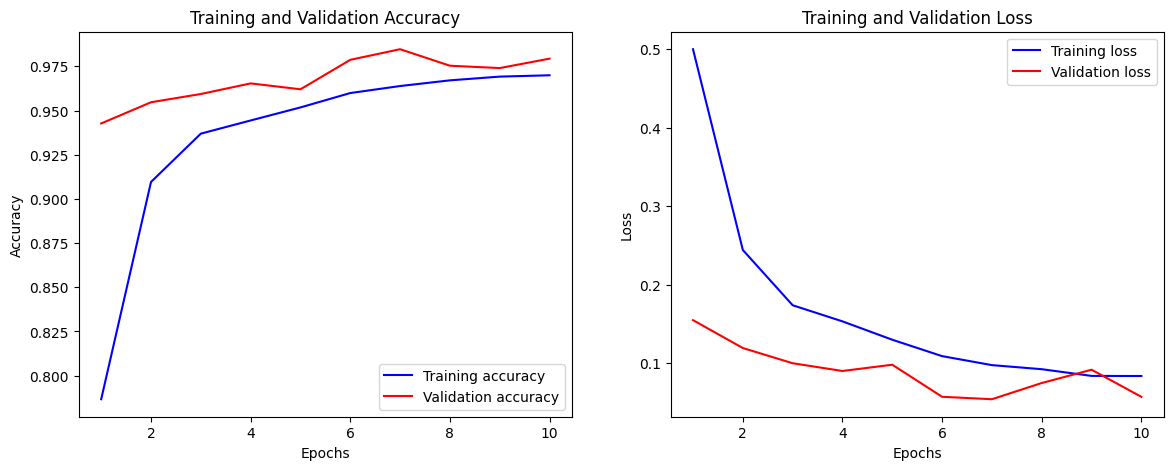

In [2]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot training and validation accuracy
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the training history
plot_training_history(history)

In [4]:
model.save('animal_emotion_augmented_model.h5')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load your trained model
model = tf.keras.models.load_model('animal_emotion_augmented_model.h5')

# Define paths and true labels
image_paths = [
    'C:\\Users\\Lenovo\\Downloads\\Animal Emotion\\afhq\\train\\cat\\flickr_cat_000002.jpg',
    'C:\\Users\\Lenovo\\Downloads\\Animal Emotion\\afhq\\train\\dog\\flickr_dog_000005.jpg',
    'C:\\Users\\Lenovo\\Downloads\\Animal Emotion\\afhq\\train\\wild\\flickr_wild_000006.jpg'
]
true_labels = ['Cat', 'Dog', 'Wildlife']  # Replace with your actual true labels

# Define class names (modify based on your actual class names)
class_names = ['Cat', 'Dog', 'Wildlife']

# Preprocess images and make predictions
predicted_labels = []
for image_path in image_paths:
    # Load and preprocess the image
    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize and add batch dimension
    
    # Predict using the loaded model
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # Get the index of the class with highest probability
    predicted_label = class_names[predicted_class]  # Get the predicted label from class_names
    
    # Append predicted label
    predicted_labels.append(predicted_label)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("\nClassification Report:")
print(class_report)

# Show plot
plt.show()


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'animal_emotion_augmented_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# Optionally, save your trained model
model.save('animal_emotion_augmented_model.h5')
